## California Housing Prices

The dataset is accessed from Kaggke and it contains information from the 1990 California census.
The aim is to predict the house price based on the other features.

The data was not cleaned. There were some missing values.So the missing values are handled and Encoding is done.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error    

In [2]:
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the data
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Data description
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


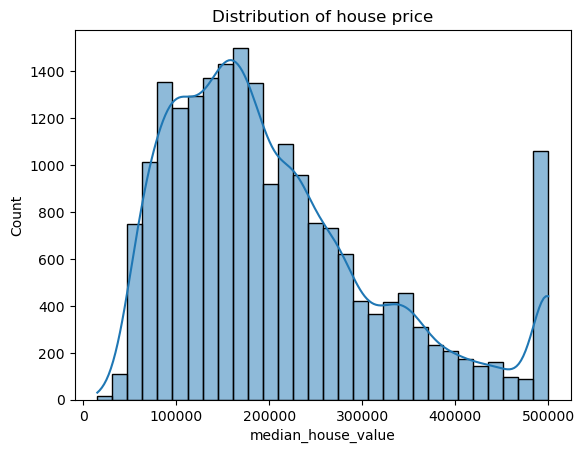

In [6]:
#Basic EDA
#Distribution of median_house_value- the house price
sns.histplot(df['median_house_value'],bins=30,kde=True)
plt.title('Distribution of house price')
plt.show()

In [7]:
#Checking for null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#Filling the null values statistically
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
#Using Label encoder for encoding categorical variable
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder=LabelEncoder()
df['ocean_proximity']=label_encoder.fit_transform(df['ocean_proximity'])

In [12]:
#Cross checking the encoded variable 
df['ocean_proximity'].value_counts()

ocean_proximity
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [14]:
#Finding the correlation between the attributes
corr=df.corr()
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069120 -0.066484           -0.319026     0.927058   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
ocean_proximity     -0.289779  0.200974            0.112468    -0.015693   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069120    0.099773    0.055310      -0.015176   
latitude 

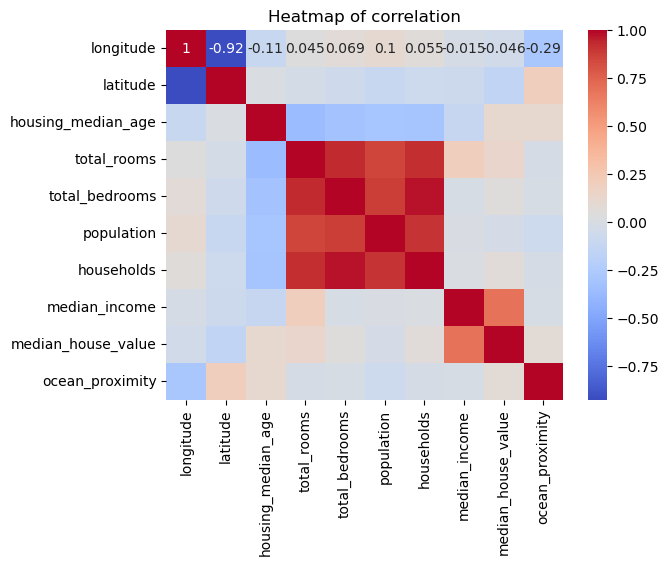

In [15]:
#Visualisation using heatmap
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Heatmap of correlation')
plt.show()

In [16]:
#Initializing the input x and y
x=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [17]:
#Splitting data as training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Implementing the models
#Model 1- Logistic Regression
from sklearn.linear_model import LogisticRegression

In [50]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
model1.score(x,y)

0.04844961240310078

In [51]:
r2_score(y_test,y_pred)

-3.353959968148736

In [52]:
#Error calculations
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
rmse=mse**0.5
print(rmse)

57054682331.63566
190011.77131782947
238861.21981526355


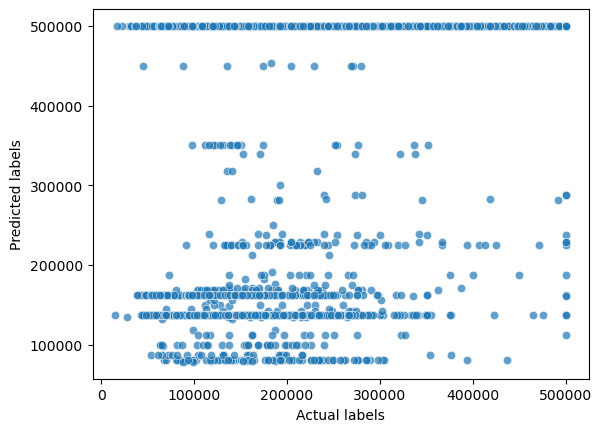

In [20]:
#visualisation
sns.scatterplot(x=y_test,y=y_pred,alpha=0.7)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.show()

In [21]:
#Calculationg the residuals
residuals=y_test-y_pred
print(residuals)

20046    -89800.0
3024    -454201.0
15663         0.0
20484   -281401.0
9814    -222001.0
           ...   
15362   -236701.0
16623   -233201.0
18086         0.0
2144    -427701.0
3665     -11000.0
Name: median_house_value, Length: 4128, dtype: float64


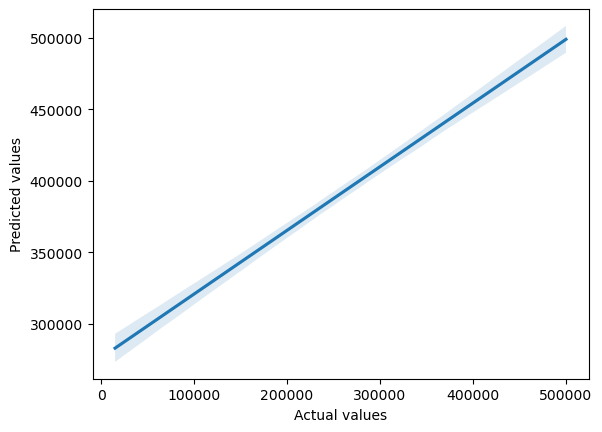

In [24]:
#Regression plot
sns.regplot(x=y_test,y=y_pred,scatter=False)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [25]:
#Model 2-Linear Regression
from sklearn.linear_model import LinearRegression

In [47]:
model2=LinearRegression()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
model2.score(x,y)

0.6349240050321052

In [48]:
r2_score(y_test,y_pred)

0.6137068886499566

In [49]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
rmse=mse**0.5
print(rmse)

5062019613.457087
51820.74815026213
71147.87146118347


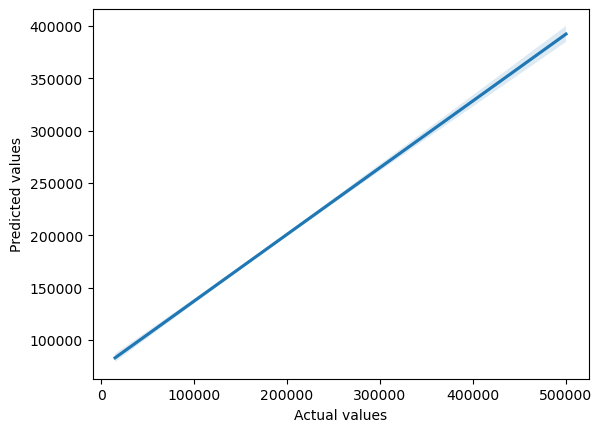

In [28]:
sns.regplot(x=y_test,y=y_pred,scatter=False)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [29]:
#Model3-Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [44]:
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
model3.score(x,y)

0.8054263565891473

In [45]:
r2_score(y_test,y_pred)

0.5297614065470528

In [46]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
rmse=mse**0.5
print(rmse)

6162048747.761144
51737.6351744186
78498.7181281398


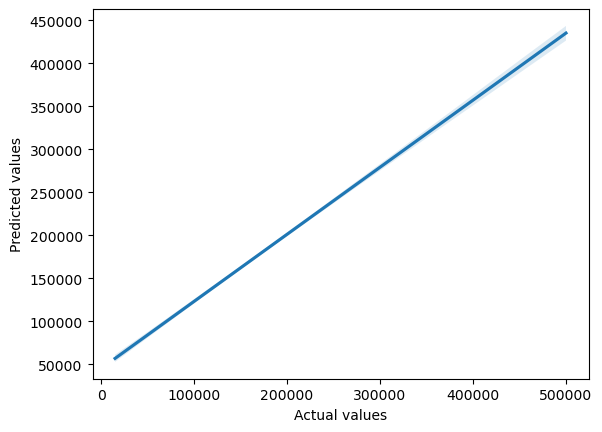

In [32]:
sns.regplot(x=y_test,y=y_pred,scatter=False)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [33]:
#Model4-SVR
from sklearn.svm import SVR

In [34]:
model4=SVR()
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
model4.score(x,y)

-0.053166547609618364

In [35]:
r2_score(y_test,y_pred)

-0.048657863496386344

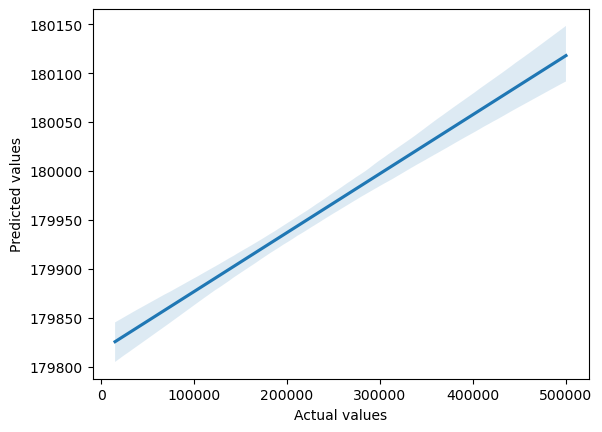

In [36]:
sns.regplot(x=y_test,y=y_pred,scatter=False)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [41]:
#Error calculation
mse=mean_squared_error(y_test,y_pred)
print(mse)

13741706794.285845


In [42]:
mae=mean_absolute_error(y_test,y_pred)
mae

87342.24398410178

In [43]:
rmse=mse**0.5
rmse

117225.02631386288